# US Census

## Import Librairies

In [1]:
%matplotlib inline
import pandas as pd
from tqdm import tqdm 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use("ggplot")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

## Import Data 

In [2]:
df_train = pd.read_csv("./us_census_full/census_income_learn.csv", header=None)
df_test = pd.read_csv("./us_census_full/census_income_test.csv", header=None)

Columns have been extracted from the census_income_metadata.txt file.

In [3]:
with open("./us_census_full/columns_2.txt", 'r') as f :
    all_cols = f.readlines()

In [4]:
colnames = [elt.split(":")[0].strip() for elt in all_cols] + ["target"]

In [5]:
df_train.columns = colnames
df_test.columns = colnames

In [6]:
df_train.head(1)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.


In [7]:
df_train.shape

(199523, 42)

We can get an overview of numericals data with the describe function of pandas DataFrames.

In [57]:
df_train.describe()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,target
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,...,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,3.485378,15.352320,11.306556,10.036292,55.426908,1.908442,3.005573,13.006135,6.302075,...,35.490124,35.666886,37.505686,3.618089,0.175438,0.993976,1.514833,23.174897,94.499672,0.062058
std,22.310895,1.105278,18.067129,14.454204,4.120910,274.896454,0.374422,1.408378,4.778346,3.104561,...,10.590776,10.378807,8.179903,1.111627,0.553694,0.099536,0.851473,24.411488,0.500001,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,3.000000,0.000000,0.000000,9.000000,0.000000,2.000000,2.000000,11.000000,6.000000,...,40.000000,40.000000,40.000000,4.000000,0.000000,1.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,3.000000,0.000000,0.000000,10.000000,0.000000,2.000000,4.000000,14.000000,6.000000,...,40.000000,40.000000,40.000000,4.000000,0.000000,1.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,4.000000,33.000000,26.000000,12.000000,0.000000,2.000000,4.000000,14.000000,7.000000,...,40.000000,40.000000,40.000000,4.000000,0.000000,1.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,8.000000,51.000000,46.000000,16.000000,9999.000000,2.000000,6.000000,23.000000,14.000000,...,42.000000,42.000000,42.000000,4.000000,2.000000,2.000000,2.000000,52.000000,95.000000,1.000000


We see that there is many categorical features. We need to turn columns into numerical data.

In [9]:
df_train.dtypes

age                                             int64
class of worker                                object
detailed industry recode                        int64
detailed occupation recode                      int64
education                                      object
wage per hour                                   int64
enroll in edu inst last wk                     object
marital stat                                   object
major industry code                            object
major occupation code                          object
race                                           object
hispanic origin                                object
sex                                            object
member of a labor union                        object
reason for unemployment                        object
full or part time employment stat              object
capital gains                                   int64
capital losses                                  int64
dividends from stocks       

## Clean Data 

We create a function to encode categorical features. To do this, we use LabelEncoder from sklearn librairy. We need to keep LabeLEncoder for each feature to keep the match between numerical and categorical values.

In [10]:
def encode_train_and_test(train, test):
    l_encoders = {}
    assert(train.shape[1]==test.shape[1])
    
    columns_to_encode = list(train.select_dtypes(include=['category','object']))
    for col in tqdm(columns_to_encode):
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col])
        test[col] = le.transform(test[col])
        l_encoders[col] = le
    return {"train":train, 
           "test":test, 
           "encoders":l_encoders}

In [11]:
result_encoding = encode_train_and_test(df_train, df_test)

100%|██████████| 29/29 [00:18<00:00,  2.49it/s]


In [12]:
df_train = result_encoding["train"]
df_test = result_encoding["test"]

We can see now that all features are numerical. 

In [13]:
df_train.dtypes

age                                             int64
class of worker                                 int64
detailed industry recode                        int64
detailed occupation recode                      int64
education                                       int64
wage per hour                                   int64
enroll in edu inst last wk                      int64
marital stat                                    int64
major industry code                             int64
major occupation code                           int64
race                                            int64
hispanic origin                                 int64
sex                                             int64
member of a labor union                         int64
reason for unemployment                         int64
full or part time employment stat               int64
capital gains                                   int64
capital losses                                  int64
dividends from stocks       

In [14]:
encoder_target = result_encoding["encoders"]["target"]

In [15]:
encoder_target.classes_, encoder_target.transform(encoder_target.classes_)

(array([' - 50000.', ' 50000+.'], dtype=object), array([0, 1]))

The target column was encoded as follows : -50 000 corresponding to 0 and + 50 000 to 1

## Some Graphs 

We can now create some graphics to try to understand distribution of features which can be more discriminant and help in decision. 

In [16]:
train_encoded = result_encoding["train"]
test_encoded = result_encoding["test"]

## Age 

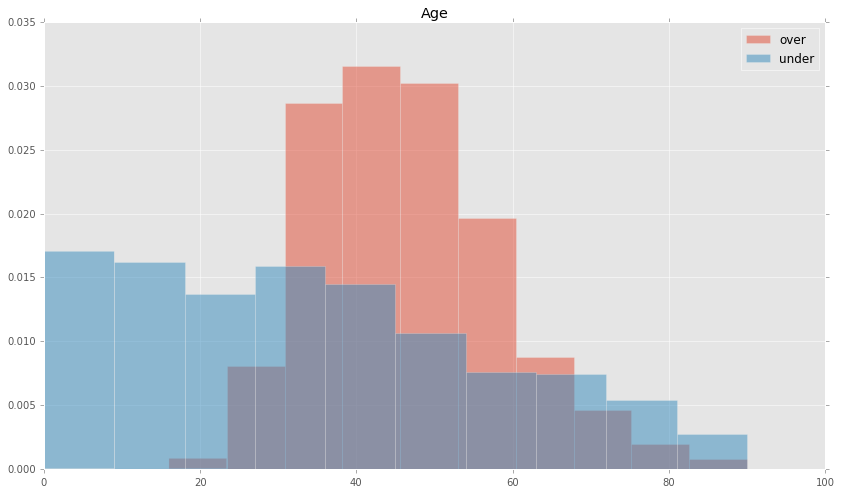

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.hist(train_encoded[train_encoded["target"]==1]["age"], label="over", alpha=0.5, normed=True);
ax.hist(train_encoded[train_encoded["target"]==0]["age"], label="under", alpha=0.5, normed=True);
ax.set_title("Age")
ax.legend()

People between 30 and 60 years old save more perhaps for their retirement. 

## Race

In [18]:
list(result_encoding["encoders"]["race"].classes_)

[' Amer Indian Aleut or Eskimo',
 ' Asian or Pacific Islander',
 ' Black',
 ' Other',
 ' White']

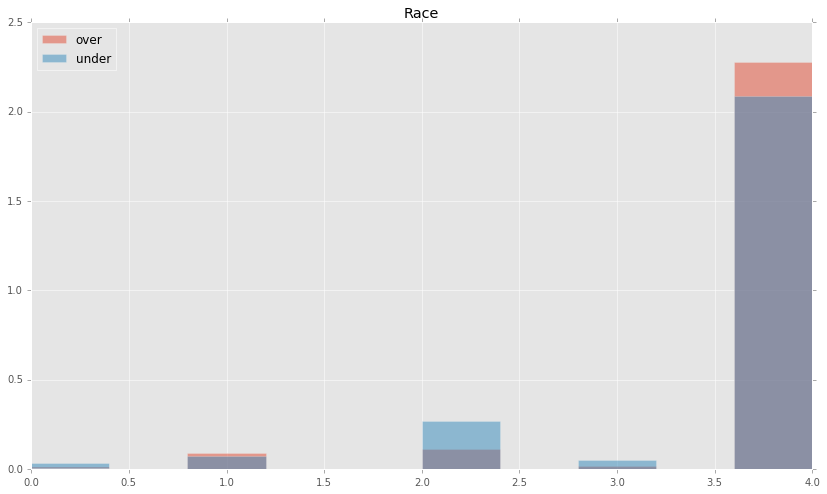

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
bins = np.arange(5)
ax.hist(train_encoded[train_encoded["target"]==1]["race"], label="over", alpha=0.5, normed=True,align="mid");
ax.hist(train_encoded[train_encoded["target"]==0]["race"], label="under", alpha=0.5, normed=True,align="mid");
ax.set_title("Race")
ax.legend(loc=0)

We see that white and asian people save more than others.

## Gender

In [20]:
result_encoding["encoders"]["sex"].classes_

array([' Female', ' Male'], dtype=object)

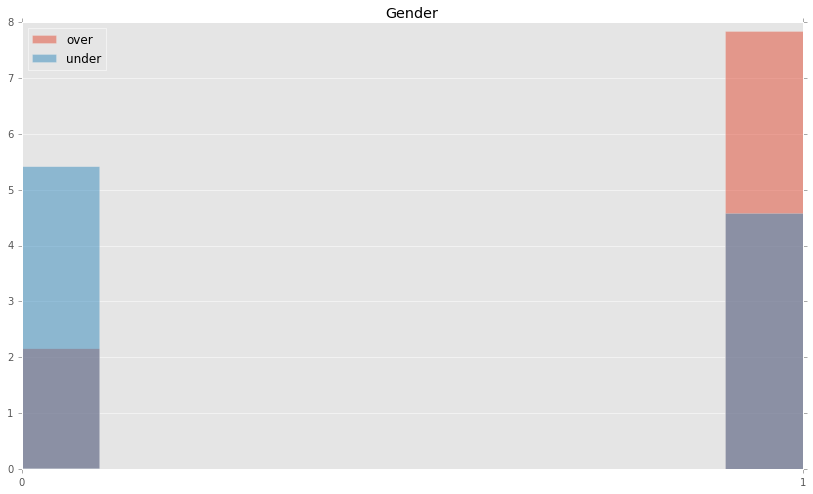

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.hist(train_encoded[train_encoded["target"]==1]["sex"], label="over", alpha=0.5, normed=True,align="mid");
ax.hist(train_encoded[train_encoded["target"]==0]["sex"], label="under", alpha=0.5, normed=True,align="mid");
ax.set_xticks([0,1])
ax.set_title("Gender")
ax.legend(loc=0)

Usually, mens save more money than womens. 

# Start do some Machine Learning

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix, classification_report, precision_recall_curve

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
def create_precision_recall_curve(y_true, pred_proba, x1=None, x2=None):
    precision1, recall1, threshold1 = precision_recall_curve(y_true=y_true,
    probas_pred=np.array(pred_proba)[:,0], pos_label=0)
    precision2, recall2, threshold2 = precision_recall_curve(y_true=y_true,
    probas_pred=np.array(pred_proba)[:,1], pos_label=1)
    fig, (ax1, ax2) = plt.subplots(1,2)

    fig.set_size_inches(18, 6)
    ax1.plot(list(threshold1) + [1], precision1, label="Precision")
    ax1.plot(list(threshold1) + [1], recall1 , label="Rappel")
    ax1.set_title("Classe Negative")
    ax2.plot(list(threshold2) + [1], precision2, label="Precision")
    ax2.plot(list(threshold2) + [1], recall2 , label="Rappel")
    ax2.set_title("Classe Positive")

In [24]:
def create_metrics(y_true, y_proba, thresh=0.5):
    proba_true =  np.array(y_proba)[:,1]
    prediction_w_thresh = [1 if elt>thresh else 0 for elt in proba_true]
    print("ROC-AUC score : %s"%roc_auc_score(y_true, proba_true))
    print("Confusion Matrix : \n " + str(confusion_matrix(y_true, prediction_w_thresh)))
    print("Classification Report : \n " + classification_report(y_true, prediction_w_thresh))
    create_precision_recall_curve(y_true, y_proba)


## Model BaseLine 

We can start to study the baseline model. This model is the model where the prediction is Naive. 

In [25]:
df_train["target"].value_counts()

0    187141
1     12382
Name: target, dtype: int64

Value of the prediction in the model baseline for binary decision is the average of the target vector.

In [26]:
prediction_baseline = np.mean(df_train["target"])
prediction_baseline

0.062058008349914547

In [27]:
roc_auc_score(df_test["target"], np.repeat(prediction_baseline, len(df_test["target"])))

0.5

In [28]:
pred_baseline = [1 if elt > 0.5 else 0 for elt in np.repeat(prediction_baseline, len(df_test["target"]))]

In [29]:
print(classification_report(df_test["target"], pred_baseline, ))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     93576
          1       0.00      0.00      0.00      6186

avg / total       0.88      0.94      0.91     99762



/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear and Ensemble Model 

We can do more efficients models with impletementation of algorithms with Scikit-learn package. We start by creating LinearModel and Ensemble Model and compare performances. To do this we have to implement cross validation with StratifiedKFold (in classification exercises) which keep the distribution of each classes in each fold.

In [30]:
y = df_train["target"]
X = df_train.drop("target", axis=1).as_matrix()

lir_pred = []
abc_pred = []
rf_pred = []
bc_pred = []

y_true_l = []

skf = StratifiedKFold(y, n_folds=6)

for train_index, test_index in tqdm(skf):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LIR = LinearRegression(n_jobs=-1)
    ABC = AdaBoostClassifier()
    RF = RandomForestClassifier(n_jobs=-1)
    BC = BaggingClassifier(n_jobs=-1)
    
    LIR.fit(X_train, y_train)
    ABC.fit(X_train, y_train)
    RF.fit(X_train, y_train)
    BC.fit(X_train, y_train)  
    
    lir_pred.extend(LIR.predict(X_test))
    abc_pred.extend(ABC.predict_proba(X_test))
    rf_pred.extend(RF.predict_proba(X_test))
    bc_pred.extend(BC.predict_proba(X_test))
    y_true_l.extend(y_test)

  0%|          | 0/6 [00:00<?, ?it/s]

TRAIN: [ 33173  33174  33175 ..., 199520 199521 199522] TEST: [    0     1     2 ..., 34206 34230 34266]


 17%|█▋        | 1/6 [00:49<04:08, 49.71s/it]

TRAIN: [     0      1      2 ..., 199520 199521 199522] TEST: [33173 33174 33175 ..., 67122 67126 67147]


 33%|███▎      | 2/6 [01:36<03:15, 48.95s/it]

TRAIN: [     0      1      2 ..., 199520 199521 199522] TEST: [ 66457  66458  66459 ..., 100141 100146 100161]


 50%|█████     | 3/6 [02:15<02:17, 45.84s/it]

TRAIN: [     0      1      2 ..., 199520 199521 199522] TEST: [ 99749  99750  99751 ..., 133104 133105 133135]


 67%|██████▋   | 4/6 [02:54<01:27, 43.88s/it]

TRAIN: [     0      1      2 ..., 199520 199521 199522] TEST: [133005 133006 133007 ..., 167184 167191 167197]


 83%|████████▎ | 5/6 [03:38<00:43, 43.78s/it]

TRAIN: [     0      1      2 ..., 167184 167191 167197] TEST: [166210 166211 166212 ..., 199520 199521 199522]


100%|██████████| 6/6 [04:17<00:00, 42.51s/it]


### Linear Model 

ROC-AUC score : 0.91403704293
Confusion Matrix : 
 [[185415   1726]
 [  9159   3223]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.95      0.99      0.97    187141
          1       0.65      0.26      0.37     12382

avg / total       0.93      0.95      0.93    199523



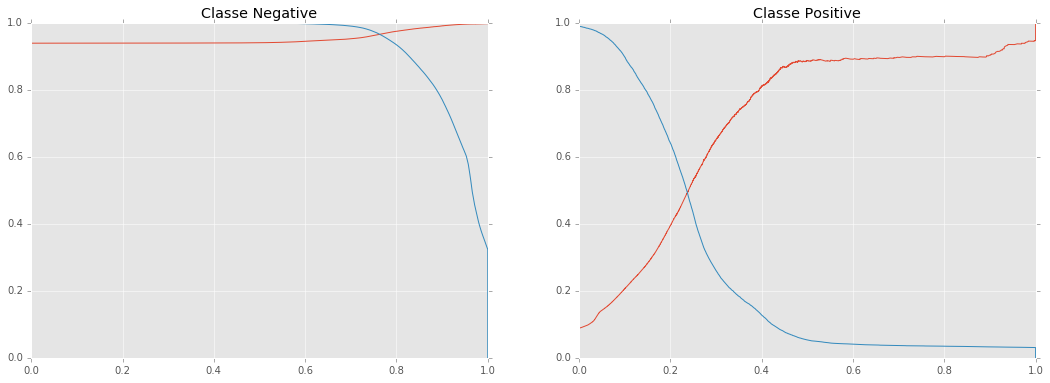

In [31]:
create_metrics(y_true_l, [(1-elt, elt) for elt in np.clip(lir_pred, 0, 1)], 0.3)

### Random Forest

ROC-AUC score : 0.894866903085
Confusion Matrix : 
 [[185331   1810]
 [  7754   4628]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.99      0.97    187141
          1       0.72      0.37      0.49     12382

avg / total       0.94      0.95      0.94    199523



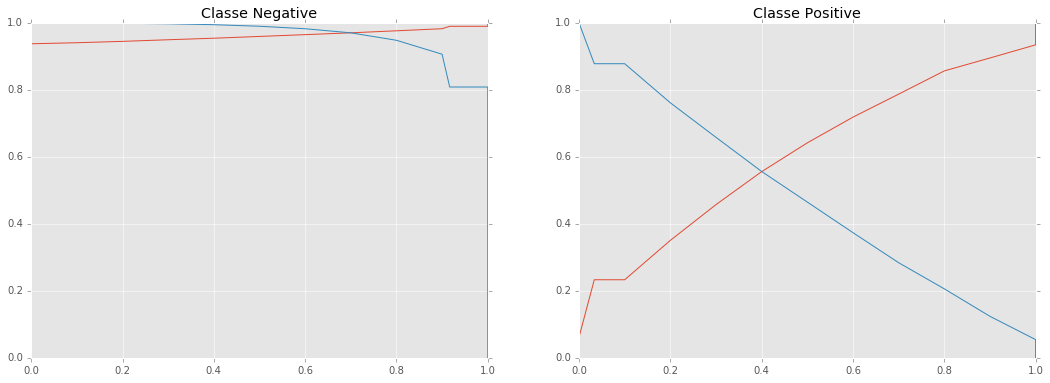

In [32]:
create_metrics(y_true_l, rf_pred)

# Go More into each two models

In [33]:
y = df_train["target"]
X = df_train.drop("target", axis=1).as_matrix()

LIR = LinearRegression(n_jobs=-1)
RF = RandomForestClassifier(n_jobs=-1)
    
LIR.fit(X, y)
RF.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Random Forest Feature Importance and LinearModel Coefficients

Random Forest create Feature Importance which is the mean of all feature importance in each tree generated and LinearModel crate basic coefficient.  

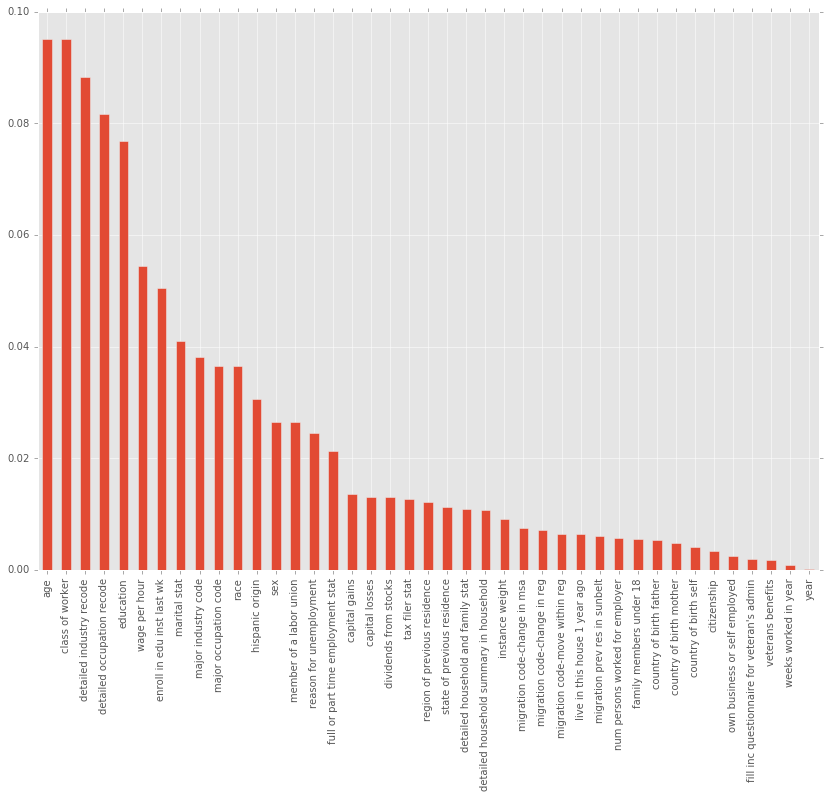

In [34]:
df_features = pd.DataFrame({"features":RF.feature_importances_, "names" : df_train.drop("target", axis=1).columns})
fig, ax = plt.subplots()
fig.set_size_inches(14,10)
df_features.sort_values("features", ascending=False).features.plot(kind="bar", ax = ax)
ax.set_xticklabels(df_features.names);

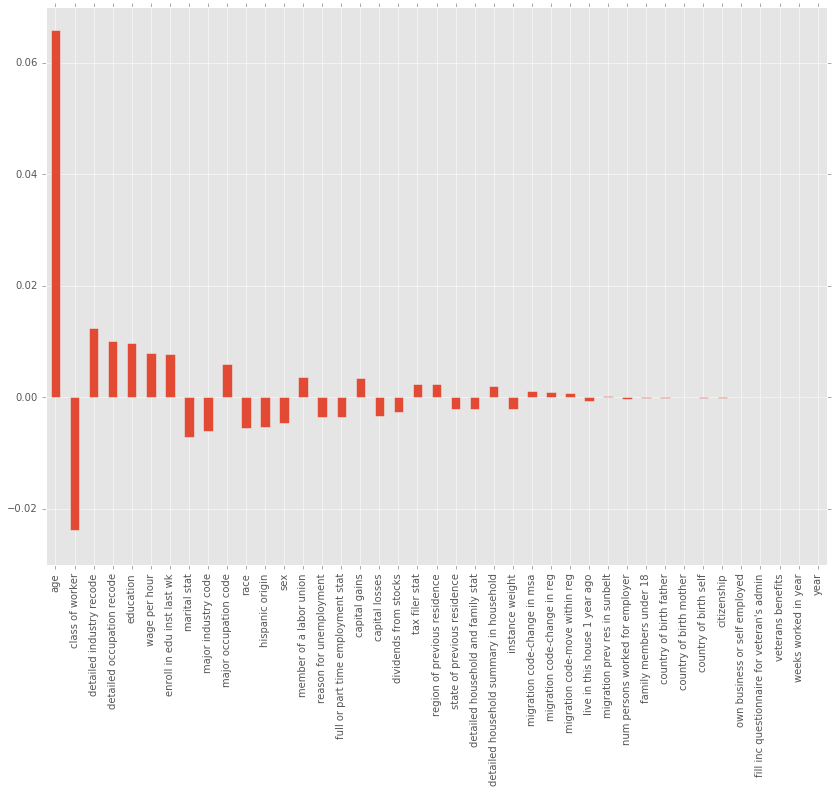

In [35]:
df_features = pd.DataFrame({"features":LIR.coef_,"feat_abs":np.abs(LIR.coef_), "names" : df_train.drop('target', axis=1).columns})
fig, ax = plt.subplots()
fig.set_size_inches(14,10)
df_features.sort_values("feat_abs", ascending=False).features.plot(kind="bar", ax = ax)
ax.set_xticklabels(df_features.names);

There is in the first position, the age that we saw in the overview at the beginning of the study.

### Three most discriminatives features

#### Class of Worker

In [36]:
result_encoding["encoders"]["class of worker"].classes_

array([' Federal government', ' Local government', ' Never worked',
       ' Not in universe', ' Private', ' Self-employed-incorporated',
       ' Self-employed-not incorporated', ' State government',
       ' Without pay'], dtype=object)

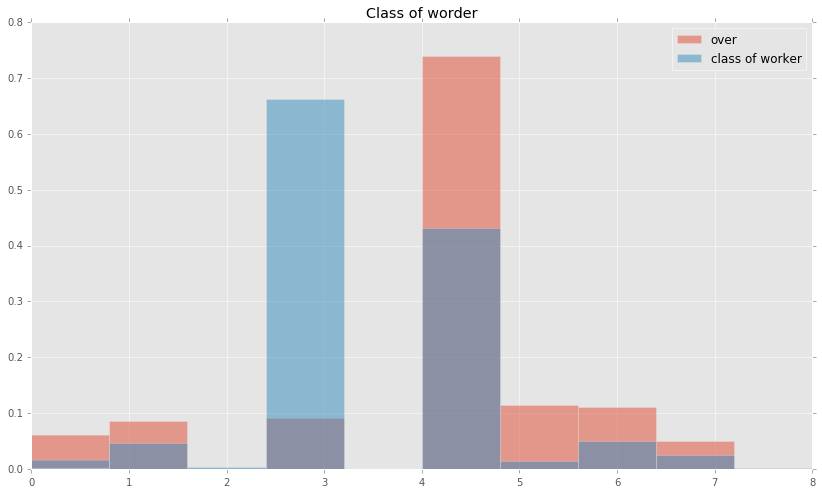

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.hist(train_encoded[train_encoded["target"]==1]["class of worker"], label="over", alpha=0.5, normed=True);
ax.hist(train_encoded[train_encoded["target"]==0]["class of worker"], alpha=0.5, normed=True);
ax.set_title("Class of worder")
ax.legend()

#### Detailed Industry Recode 

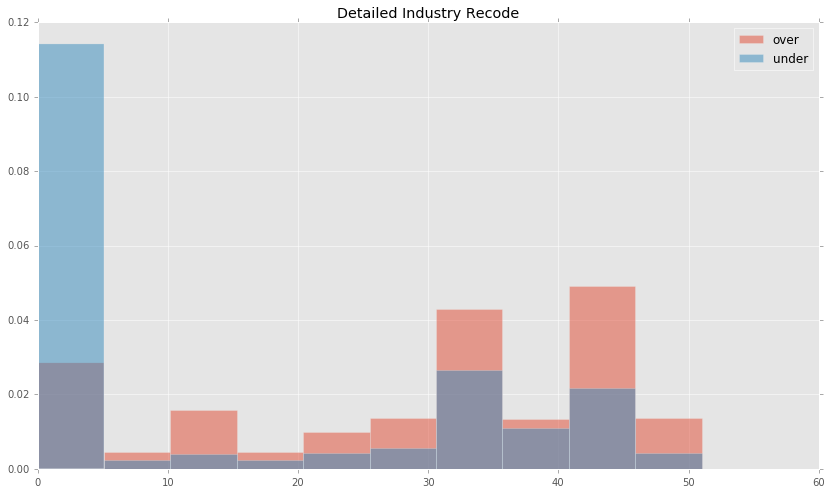

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.hist(train_encoded[train_encoded["target"]==1]["detailed industry recode"], label="over", alpha=0.5, normed=True);
ax.hist(train_encoded[train_encoded["target"]==0]["detailed industry recode"], label="under", alpha=0.5, normed=True);
ax.set_title("Detailed Industry Recode")
ax.legend()

#### Detailed Occupation Recode 

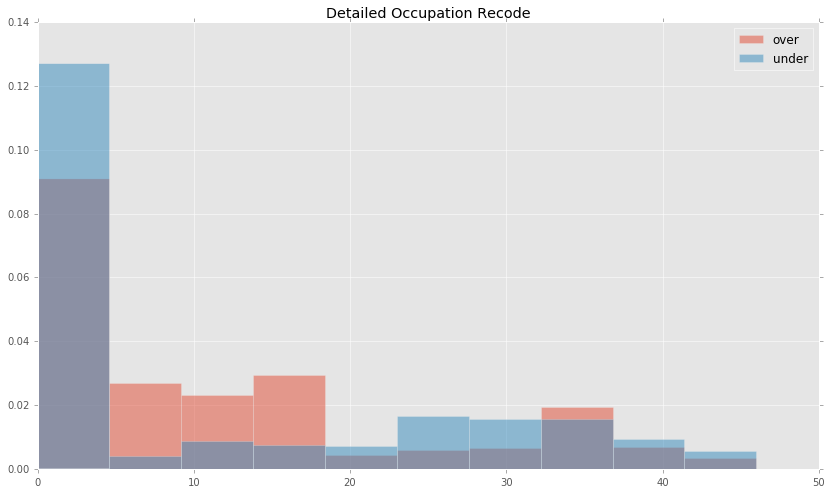

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(14,8)
ax.hist(train_encoded[train_encoded["target"]==1]["detailed occupation recode"], label="over", alpha=0.5, normed=True);
ax.hist(train_encoded[train_encoded["target"]==0]["detailed occupation recode"], label="under", alpha=0.5, normed=True);
ax.set_title("Detailed Occupation Recode")
ax.legend()

# Features selection

Despite the fact that there is not many features, we can want to reduce the number of dimension of the dataset.

In [40]:
df_train.shape, df_test.shape

((199523, 42), (99762, 42))

In [41]:
y = df_train["target"]
X = df_train.drop("target", axis=1).as_matrix()
X_test = df_test.drop("target", axis=1).as_matrix()
y_test = df_test.target

RF = RandomForestClassifier(n_jobs=-1)
    
RF.fit(X, y)

predict_proba_best_features = RF.predict_proba(X_test)

ROC-AUC score : 0.898043716654
Confusion Matrix : 
 [[92720   856]
 [ 3870  2316]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.99      0.98     93576
          1       0.73      0.37      0.49      6186

avg / total       0.95      0.95      0.95     99762



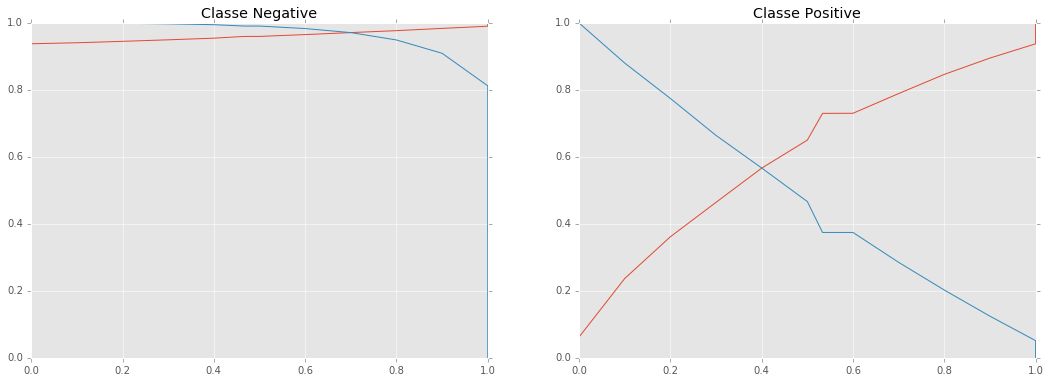

In [42]:
create_metrics(y_test, predict_proba_best_features)

## Keep only bests features

In [43]:
df_features = pd.DataFrame({"features":LIR.coef_,"feat_abs":np.abs(LIR.coef_), "names" : df_train.drop('target', axis=1).columns})
best_features_columns = df_features.sort_values("features", ascending=False).names[0:15]

In [44]:
y = df_train["target"]
X = df_train[best_features_columns].as_matrix()
X_test = df_test[best_features_columns].as_matrix()
y_test = df_test.target

RF = RandomForestClassifier(n_jobs=-1)
    
RF.fit(X, y)

predict_proba_best_features = RF.predict_proba(X_test)

ROC-AUC score : 0.857490222836
Confusion Matrix : 
 [[92120  1456]
 [ 4238  1948]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.98      0.97     93576
          1       0.57      0.31      0.41      6186

avg / total       0.93      0.94      0.94     99762



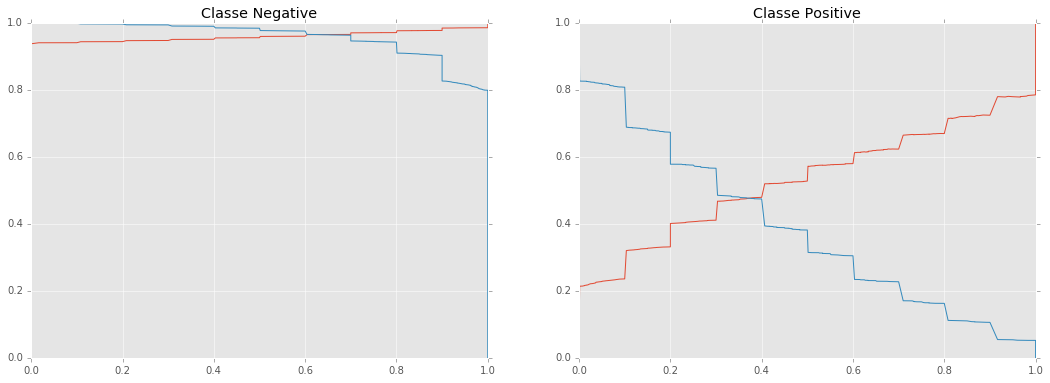

In [45]:
create_metrics(y_test, predict_proba_best_features)

This reduction (Naive) of variables does not produce better performances, mostly with Random Forest because trees are generated with few variables by default sqrt(n_features).  

### With Only One Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
y = df_train["target"]
X = df_train[best_features_columns].as_matrix()
X_test = df_test[best_features_columns].as_matrix()
y_test = df_test.target

DTC = DecisionTreeClassifier()
    
DTC.fit(X, y)

predict_proba_best_features = DTC.predict_proba(X_test)

ROC-AUC score : 0.684279212001
Confusion Matrix : 
 [[89769  3807]
 [ 3778  2408]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.96      0.96     93576
          1       0.39      0.39      0.39      6186

avg / total       0.92      0.92      0.92     99762



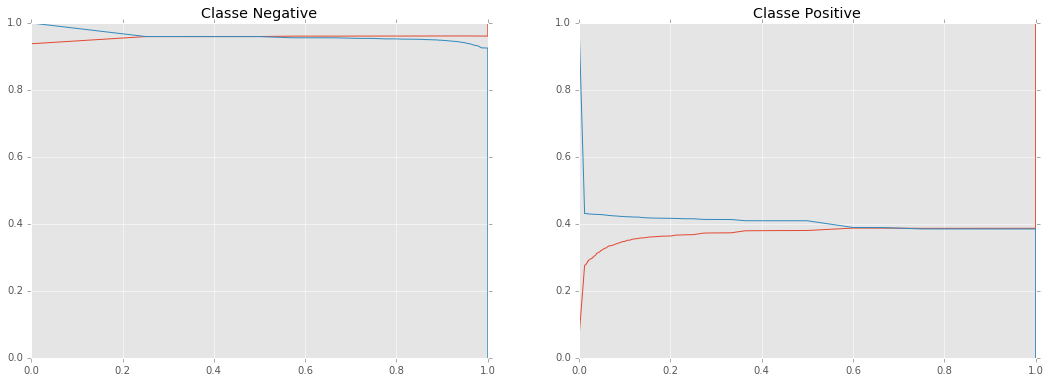

In [48]:
create_metrics(y_test, predict_proba_best_features)

We can see the importance of model bagging. Here the tree alone gives us bad performances on the AUC score and with precision recall. 

### Principal Component Analysis 

In [49]:
from sklearn.decomposition import PCA

y = df_train["target"]
X = df_train.drop("target", axis=1).as_matrix()
X_test = df_test.drop("target", axis=1).as_matrix()
y_test = df_test.target

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)

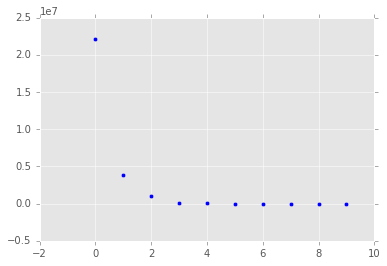

In [50]:
plt.scatter(np.arange(len(pca.explained_variance_)),pca.explained_variance_);

In [59]:
X_train_pca.shape, X_test_pca.shape

((199523, 10), (99762, 10))

In [52]:
RF = RandomForestClassifier(n_jobs=-1)
    
RF.fit(X_train_pca, y)

predict_proba_pca =  RF.predict_proba(X_test_pca)

ROC-AUC score : 0.865872301367
Confusion Matrix : 
 [[92622   954]
 [ 4321  1865]]
Classification Report : 
              precision    recall  f1-score   support

          0       0.96      0.99      0.97     93576
          1       0.66      0.30      0.41      6186

avg / total       0.94      0.95      0.94     99762



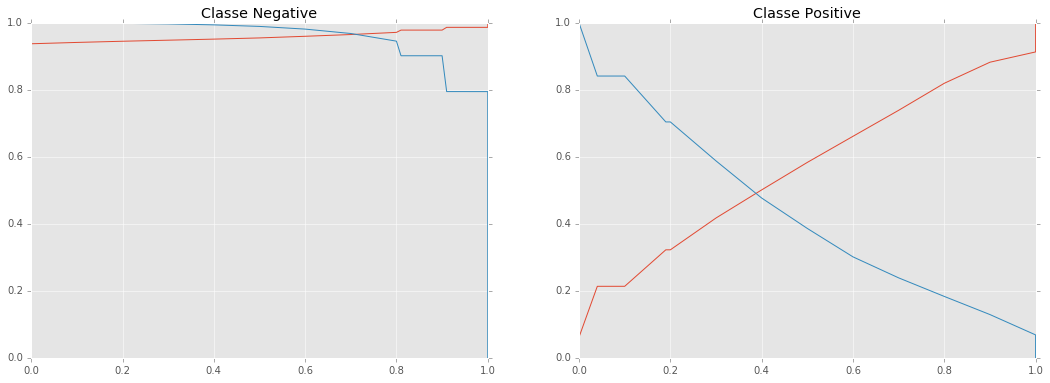

In [53]:
create_metrics(y_test, predict_proba_pca)

Here performances are not as good as RF with all features.

The number of features is not enough to implement feature Selection. Feature selection can be used in TextMining where the created TFIDF matrix is very sparse. In this case we can use Spectral Embedding, Chi2 Selection, or Singular Value Decomposition to reduce the number of features.

## Next Steps ...

- We can try to optimise different model with RandomizedGridSearch 
- We can try to use model bagging 